<a href="https://colab.research.google.com/github/AminaZahid/Analyzing-Job-Trends-in-Software-Industry-using-LDA/blob/main/Trends_in_the_Software_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data1=pd.read_excel('/content/drive/MyDrive/All 10 freelane-webs.xlsx')
data1

,Jobs,Job Type,Salary
0,Microsoft Office,NaN,$16/ Hr
1,Logo Design,NaN,$150
2,mysql,NaN,$125
3,iPhone App Development,NaN,$351
4,Articles,NaN,$6
...,...,...,...
4548,UX/UI Product Designer*in (m/f/d),Full-time-Remote Friendly,NaN
4549,Senior Designer,Full-time-Remote Friendly,NaN
4550,Graphic Designer (Freelance-to-Hire),Full-time-Remote Friendly,NaN
4551,Digital Marketing Graphic Designer,Full-time-Remote Friendly,NaN


In [4]:
df=data1.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Jobs      4547 non-null   object
 1   Job Type  1997 non-null   object
 2   Salary    768 non-null    object
dtypes: object(3)
memory usage: 106.8+ KB


In [6]:
df.describe()

,Jobs,Job Type,Salary
count,4547,1997,768
unique,2309,146,345
top,graphics design,Full-Time,$6
freq,103,799,31


In [7]:
df.isna().sum()

Jobs           6
Job Type    2556
Salary      3785
dtype: int64

In [8]:
df['Jobs'].count()

4547

In [9]:
df['Jobs'].unique()

array(['Microsoft Office', 'Logo Design', 'mysql', ...,
       'Graphic Designer (Freelance-to-Hire)',
       'Digital Marketing Graphic Designer', 'Senior UI/UX Designer'],
      dtype=object)

In [10]:
a = df['Jobs'].unique()
a

array(['Microsoft Office', 'Logo Design', 'mysql', ...,
       'Graphic Designer (Freelance-to-Hire)',
       'Digital Marketing Graphic Designer', 'Senior UI/UX Designer'],
      dtype=object)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Jobs')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12321 missing from current font.
  font.set_text(s

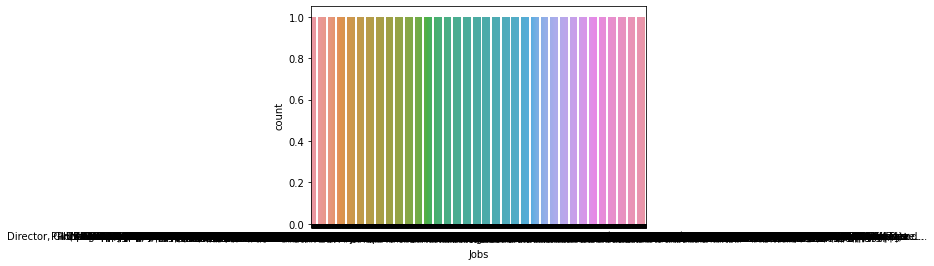

In [12]:
sns.countplot(x = a, data = df)
plt.xlabel('Jobs')

Text(0.5, 0, 'Job Type')

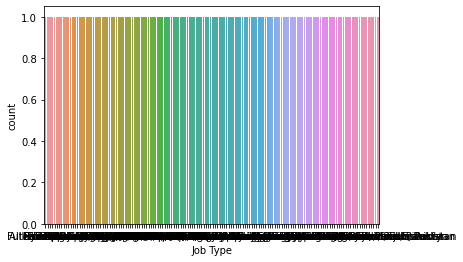

In [13]:
c = df['Job Type'].unique()
sns.countplot(x = c, data = df)
plt.xlabel('Job Type')

In [14]:
df1 = len(df['Job Type'].dropna())
df1

1997

In [15]:
df2 = len(df['Jobs'].dropna())
df2

4547

In [16]:
df3 = len(df['Salary'].dropna())
df3

768

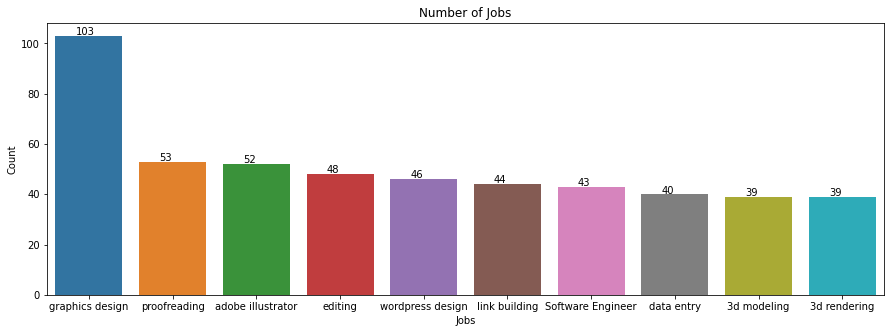

In [17]:
country_data=df.groupby('Jobs').size().sort_values(ascending=False).head(10)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(15,5))
_ = plt.title('Number of Jobs')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Jobs')
_ = plt.ylabel('Count')

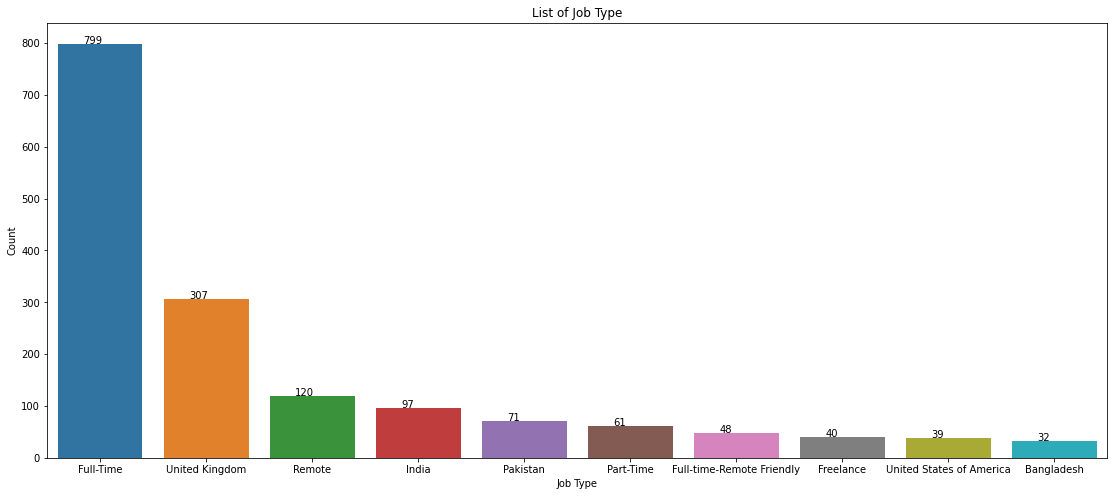

In [18]:
country_data=df.groupby('Job Type').size().sort_values(ascending=False).head(10)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(19,8))
_ = plt.title('List of Job Type')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Job Type')
_ = plt.ylabel('Count')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


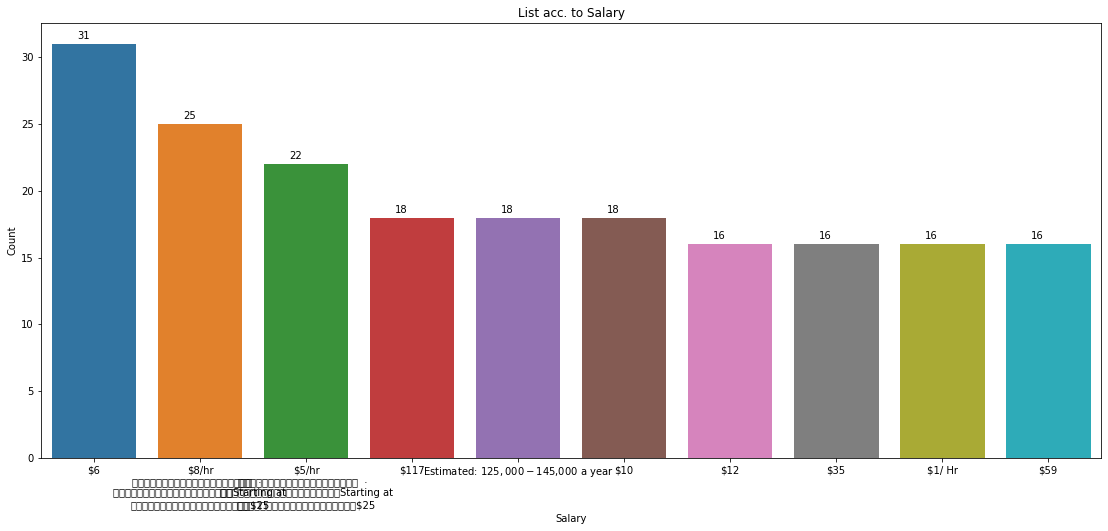

In [19]:
country_data=df.groupby('Salary').size().sort_values(ascending=False).head(10)
country = country_data.index.tolist()
values = country_data.values.tolist()

_ = plt.figure(figsize=(19,8))
_ = plt.title('List acc. to Salary')
g = sns.barplot(x=country,y=values)
for i in g.patches:
    _ = g.text(i.get_x()+.24,i.get_height()+.38,str(int(round(i.get_height(),0))))
_ = plt.xlabel('Salary')
_ = plt.ylabel('Count')

In [26]:
import plotly.express as px

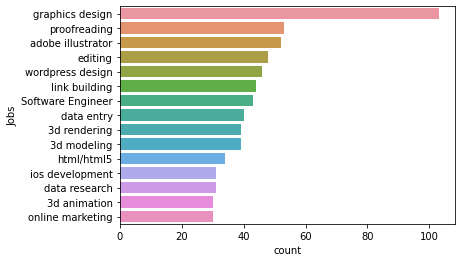

In [39]:
sns.countplot(y=df.Jobs,order=df.Jobs.value_counts().iloc[:15].index)
# plt.xticks(rotation=90)
plt.show()

In [42]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.Jobs.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['microsoft', 'office']


In [43]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


In [44]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"designer" + 0.040*"product" + 0.031*"html" + 0.027*"developer" + '
  '0.026*"senior" + 0.020*"software" + 0.016*"specialist" + 0.016*"ui" + '
  '0.016*"ux" + 0.014*"design"'),
 (1,
  '0.043*"editing" + 0.031*"software" + 0.030*"design" + 0.025*"engineer" + '
  '0.022*"rendering" + 0.019*"proofreading" + 0.018*"development" + '
  '0.018*"image" + 0.017*"web" + 0.017*"testing"'),
 (2,
  '0.046*"designer" + 0.035*"developer" + 0.032*"design" + 0.029*"wordpress" + '
  '0.027*"animation" + 0.026*"web" + 0.017*"software" + 0.014*"building" + '
  '0.014*"link" + 0.013*"amazon"'),
 (3,
  '0.110*"software" + 0.049*"web" + 0.047*"engineer" + 0.034*"design" + '
  '0.033*"development" + 0.032*"developer" + 0.028*"develop" + 0.020*"mobile" '
  '+ 0.018*"js" + 0.015*"application"'),
 (4,
  '0.044*"graphics" + 0.041*"development" + 0.040*"software" + '
  '0.040*"marketing" + 0.038*"design" + 0.022*"designer" + 0.018*"adobe" + '
  '0.018*"web" + 0.018*"engineer" + 0.016*"wordpress"'),
 

In [46]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [50]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/LDAdataprep'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/LDA_Results'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.050279 -0.052529       1        1  12.890818
3      0.082588 -0.125484       2        1  11.753881
2      0.015404  0.062685       3        1  11.158256
8     -0.106586  0.102570       4        1  10.555966
6      0.040132 -0.019929       5        1   9.646510
0      0.150659  0.096422       6        1   9.406957
4     -0.071505  0.008813       7        1   9.252630
9      0.001420  0.076615       8        1   9.187921
1     -0.111045 -0.035289       9        1   8.232016
5     -0.051347 -0.113874      10        1   7.915045, topic_info=            Term        Freq       Total Category  logprob  loglift
676     graphics  112.000000  112.000000  Default  30.0000  30.0000
148     software  598.000000  598.000000  Default  29.0000  29.0000
77       editing   77.000000   77.000000  Default  28.0000  28.0000
559     designer  305.000000  305.000000  Default  27.0000  27.0000
2         design  437.000000  437.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
144        video    7.076747   35.936281  Topic10  -5.1638   0.9115
897  woocommerce    6.530509   25.577075  Topic10  -5.2441   1.1712
154       python    6.966761   60.370083  Topic10  -5.1795   0.3771
33       english    6.541430   38.981217  Topic10  -5.2425   0.7515
44        mobile    6.532138   79.601364  Topic10  -5.2439   0.0361

[664 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1797      1  0.864380        abap
651       1  0.227966  accounting
651       2  0.136780  accounting
651       3  0.091186  accounting
651       5  0.045593  accounting
...     ...       ...         ...
868       4  0.066847       years
868       8  0.601622       years
868      10  0.066847       years
1896      2  0.806920         yii
1825     10  0.805119      zapier

[1471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 3, 9, 7, 1, 5, 10, 2, 6])